# Ad-Hoc Reporting

Utilize your `sqlite3` and `pandas` knowledge to query your database and generate visualizations! 

After completing your report, answer the 4 analytical questions below. Remember that we expect comprehensive numerical detail! 

In [40]:
import sqlite3

import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12, 8)

In [41]:
# TODO: Set up a connection the "Market.db" database
conn = sqlite3.connect('db/Market.db')

# TODO: Set up the cursor
cursor = conn.cursor()

### Question 1 : Total Products Less than €10

How many products in our Products table cost less than 10 EUR?

**Hint**: You can apply an aggregate function to an entire table.

In [42]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
    SELECT COUNT(ProductName)
        FROM Products
        WHERE Price < 10

""")

rows = cursor.fetchall()
print(rows)

[(11,)]


### Question 2 : Most Frequent Country by Supplier

What is the most common country of origin in our Suppliers table? Sort your output in descending order.

**Hint**: `GROUP BY` can be used to calculate grouped aggregates.

In [43]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
    SELECT country, COUNT(country) as Count
        FROM Suppliers
        GROUP BY country
        ORDER BY Count DESC
""")

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()
print(rows)

[('USA', 4), ('Germany', 3), ('France', 3), ('UK', 2), ('Sweden', 2), ('Japan', 2), ('Italy', 2), ('Canada', 2), ('Australia', 2), ('Spain', 1), ('Singapore', 1), ('Norway', 1), ('Netherlands', 1), ('Finland', 1), ('Denmark', 1), ('Brazil', 1)]


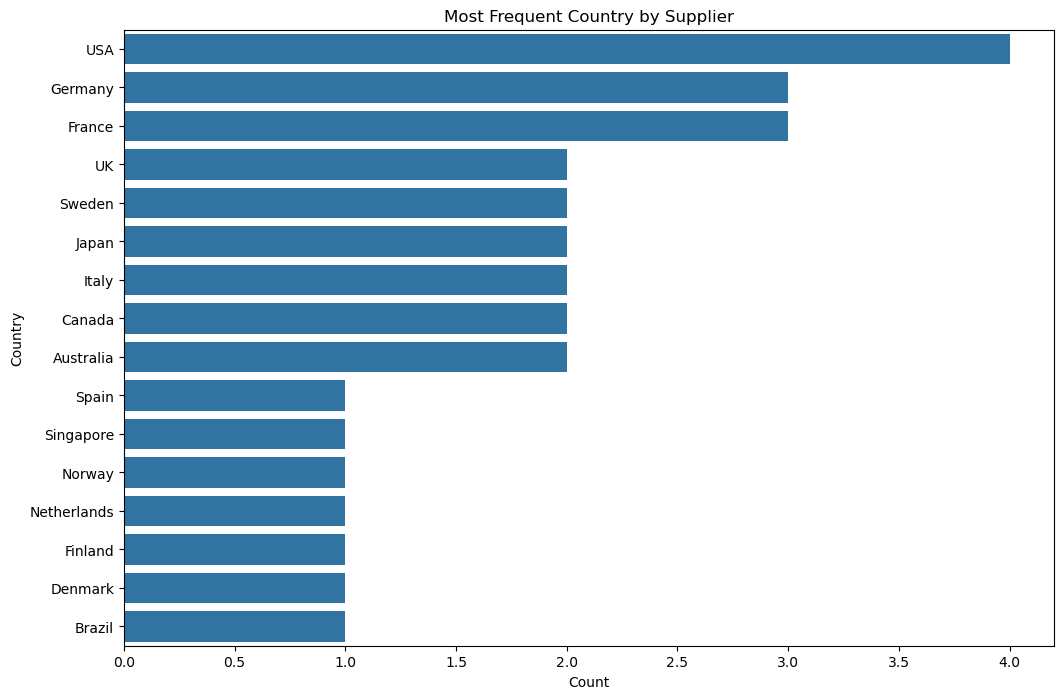

In [44]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns=['Country', "Count"])

# TODO: Generate a visualization on this dataframe
sns.barplot(data= df, y="Country", x='Count' )
plt.title('Most Frequent Country by Supplier')
plt.show()

### Question 3 : Most Frequent Country by Customer

What is the most common country of origin in our Customers table? Sort your output in descending order.

**Hint**: `GROUP BY` can be used to calculate grouped aggregates.

In [45]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
             SELECT country, COUNT(CustomerName) as count
               FROM Customers
               GROUP BY country
               ORDER BY count DESC
               """)

# TODO: Fetch your list of tuples and print it out
rows= cursor.fetchall()
rows

[('USA', 13),
 ('Germany', 11),
 ('France', 11),
 ('Brazil', 9),
 ('UK', 7),
 ('Spain', 5),
 ('Mexico', 5),
 ('Venezuela', 4),
 ('Italy', 3),
 ('Canada', 3),
 ('Argentina', 3),
 ('Switzerland', 2),
 ('Sweden', 2),
 ('Portugal', 2),
 ('Finland', 2),
 ('Denmark', 2),
 ('Belgium', 2),
 ('Austria', 2),
 ('Poland', 1),
 ('Norway', 1),
 ('Ireland', 1)]

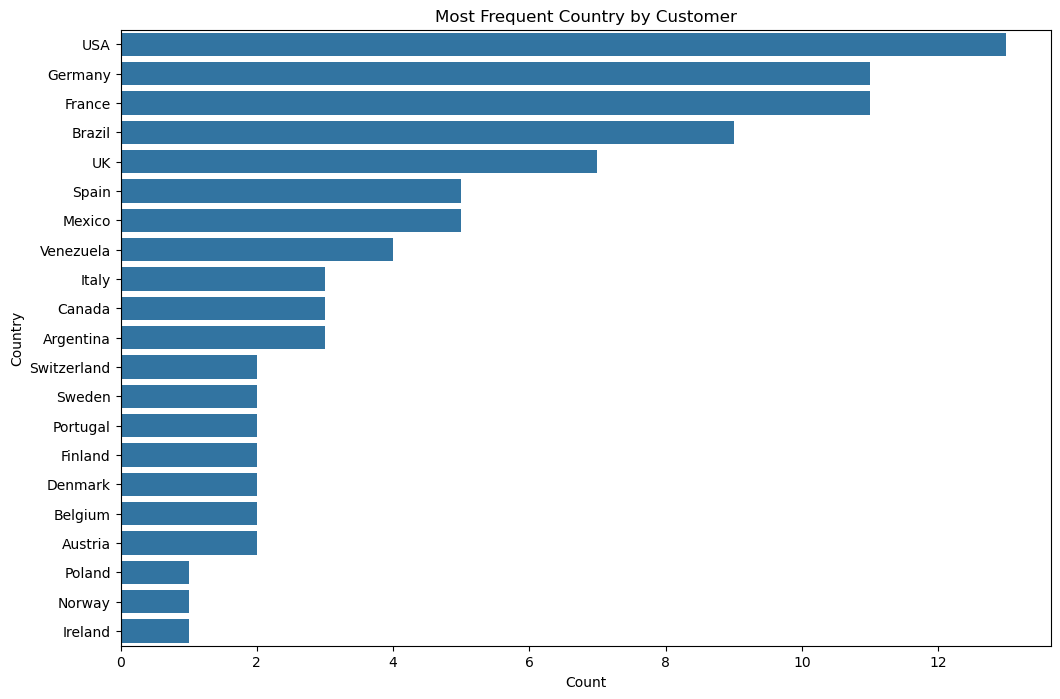

In [46]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns=['Country', 'Count'])

# TODO: Generate a visualization on this dataframe
sns.barplot(data= df, y="Country", x='Count' )
plt.title('Most Frequent Country by Customer')
plt.show()

### Question 4 : Least Popular Products by Quantity

What are the least popular products by order quantity? Limit your output to the bottom 20 products. Sort this table in ascending order and be sure to include the product name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [61]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
               SELECT p.ProductName, SUM(o.quantity) AS total_ordered
               FROM OrderDetails o 
               LEFT JOIN Products p ON p.productId = o.productId
               GROUP BY p.ProductName
               ORDER BY total_ordered
               LIMIT 20
               """)

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()
rows

[('Laughing Lumberjack Lager', 5),
 ('Røgede sild', 15),
 ("Gustaf's Knäckebröd", 18),
 ('Mishi Kobe Niku', 20),
 ('Genen Shouyu', 25),
 ("Uncle Bob's Organic Dried Pears", 25),
 ('Queso Manchego La Pastora', 27),
 ("Grandma's Boysenberry Spread", 36),
 ('Gravad lax', 39),
 ('Röd Kaviar', 45),
 ('Filo Mix', 48),
 ('Mascarpone Fabioli', 52),
 ('Chocolade', 70),
 ('Valkoinen suklaa', 70),
 ('NuNuCa Nuß-Nougat-Creme', 71),
 ('Singaporean Hokkien Fried Mee', 77),
 ('Aniseed Syrup', 80),
 ('Ikura', 85),
 ('Louisiana Hot Spiced Okra', 90),
 ('Schoggi Schokolade', 90)]

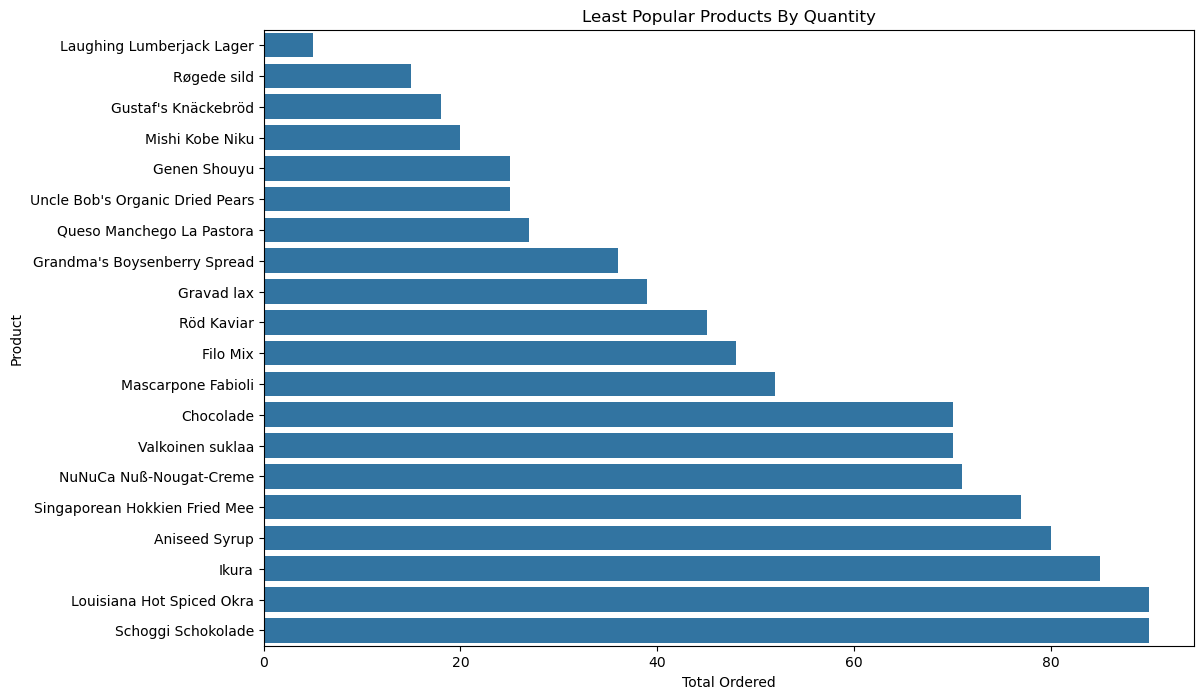

In [65]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns=['Product', 'Total Ordered'])

# TODO: Generate a visualization on this dataframe
sns.barplot(data= df, y="Product", x='Total Ordered' )
plt.title('Least Popular Products By Quantity')
plt.show()

### Question 5 : Least Popular Products by Revenue

What are the least popular products by **total revenue** (order quantity * price)? Sort this table in ascending order and be sure to include the product name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [49]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
              SELECT p.ProductName, COUNT(o.quantity)*p.price AS revenue
               FROM OrderDetails o 
               LEFT JOIN Products p ON p.productId = o.productId
               GROUP BY p.ProductName
               ORDER BY revenue
               LIMIT 20
               """)

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()
rows

[('Røgede sild', 9.5),
 ('Chocolade', 12.75),
 ('Laughing Lumberjack Lager', 14),
 ('Aniseed Syrup', 20),
 ('Filo Mix', 21),
 ('Geitost', 22.5),
 ('Zaanse koeken', 28.5),
 ('Röd Kaviar', 30),
 ('Genen Shouyu', 31.0),
 ('Louisiana Hot Spiced Okra', 34),
 ('Tunnbröd', 36),
 ("Gustaf's Knäckebröd", 42),
 ('Konbu', 42),
 ('Valkoinen suklaa', 48.75),
 ('Guaraná Fantástica', 49.5),
 ("Grandma's Boysenberry Spread", 50),
 ('Escargots de Bourgogne', 53.0),
 ('NuNuCa Nuß-Nougat-Creme', 56),
 ("Sirop d'érable", 57.0),
 ("Uncle Bob's Organic Dried Pears", 60)]

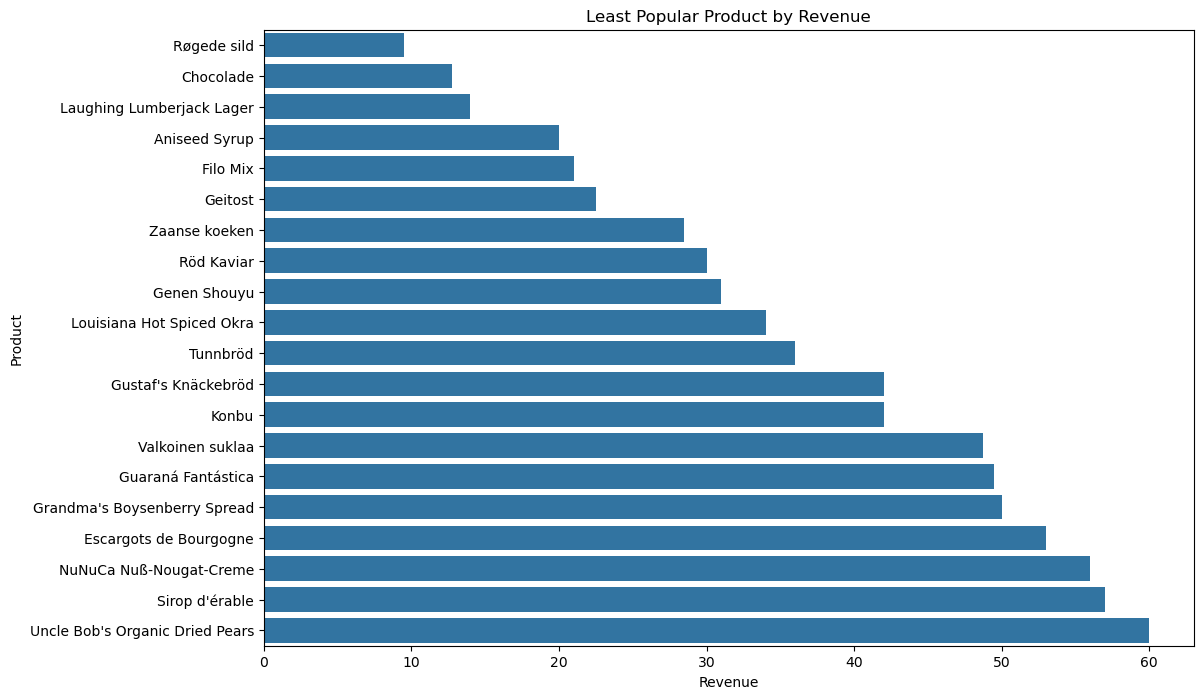

In [50]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns=['Product', 'Revenue'])

# TODO: Generate a visualization on this dataframe
sns.barplot(data= df, y="Product", x="Revenue")
plt.title("Least Popular Product by Revenue")
plt.show()

### Question 6 : Countries with the Most Orders

Which country's have placed the most orders? For each country, list its' name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [51]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
                SELECT c.country, COUNT(c.country) AS count
                FROM Customers c
                JOIN Orders o ON c.customerId = o.customerId
                GROUP BY c.country
                ORDER BY count DESC
               """)

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()
rows

[('USA', 29),
 ('Germany', 25),
 ('Brazil', 19),
 ('France', 18),
 ('Austria', 13),
 ('UK', 12),
 ('Venezuela', 9),
 ('Mexico', 9),
 ('Canada', 9),
 ('Finland', 8),
 ('Sweden', 7),
 ('Spain', 7),
 ('Italy', 7),
 ('Ireland', 6),
 ('Portugal', 5),
 ('Switzerland', 4),
 ('Denmark', 4),
 ('Belgium', 2),
 ('Poland', 1),
 ('Norway', 1),
 ('Argentina', 1)]

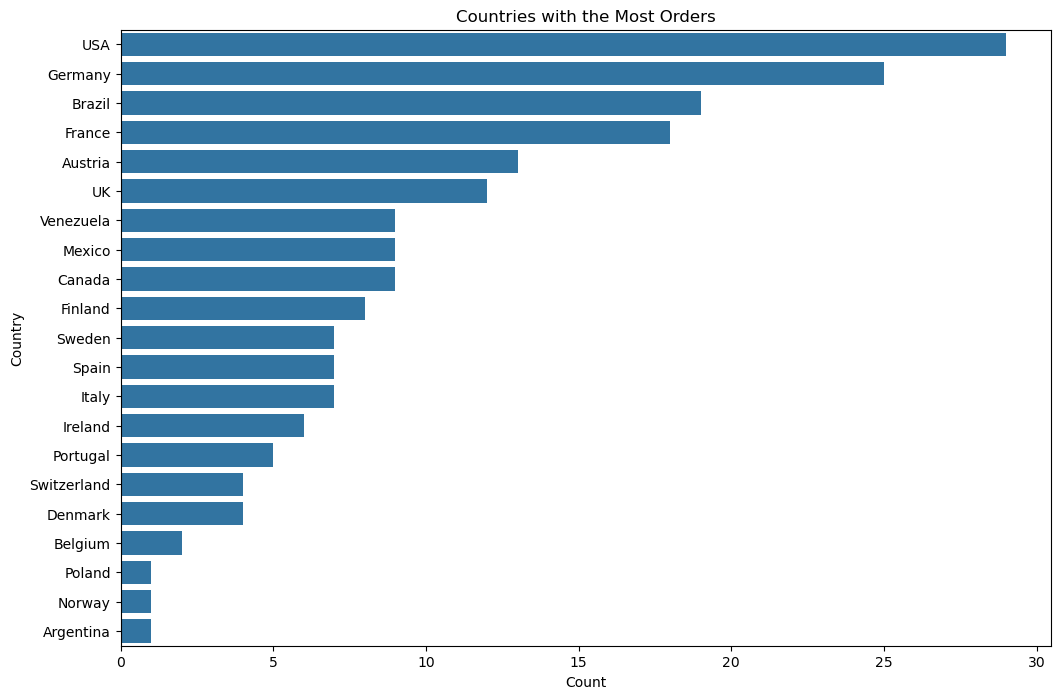

In [52]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns=["Country", "Count"])

# TODO: Generate a visualization on this dataframe
sns.barplot(data= df, y="Country", x="Count")
plt.title("Countries with the Most Orders")
plt.show()

### Question 7 : Countries with Customers Who Do Not Order

Which countries have at least one customer who has placed **no** orders? Count up the total number of customers who have placed no orders for each respective country. For each country, list its' name in your output and visualizations.

**Hint**: A join is necessary. We can also check if a column is `NULL` using the `IS` keyword.

In [53]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute(""" 
                SELECT c.country, COUNT(c.customerId) as no_orders
                FROM Customers c
                LEFT JOIN Orders o ON c.customerId = o.customerId
                WHERE o.orderId IS NULL
                GROUP BY c.country
                ORDER BY no_orders DESC
               """)

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()
rows

[('USA', 5),
 ('France', 4),
 ('Germany', 2),
 ('Argentina', 2),
 ('UK', 1),
 ('Spain', 1),
 ('Canada', 1),
 ('Belgium', 1)]

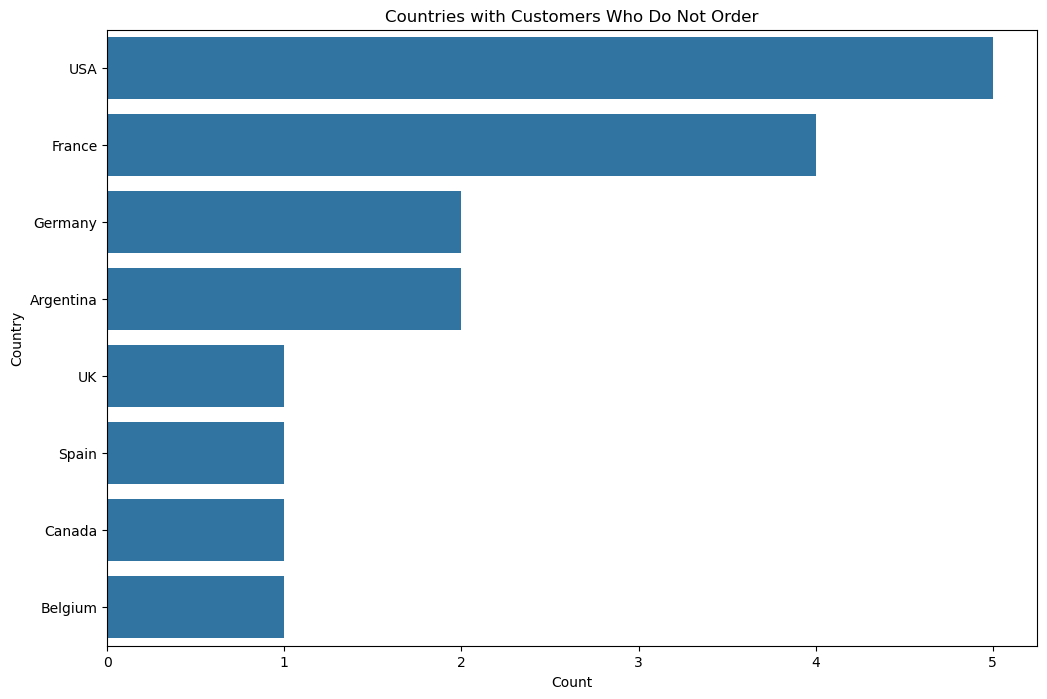

In [54]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns=["Country", "Count"])

# TODO: Generate a visualization on this dataframe
sns.barplot(data= df, y="Country", x="Count")
plt.title("Countries with Customers Who Do Not Order")
plt.show()

### Question 8 : Most Popular Suppliers

What are the most popular suppliers according to order count? List the supplier names and their number of orders. Sort your output in descending order.

**Hint**: You might need to use a subquery to join more than 2 tables together.

In [55]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
                SELECT s.SupplierName, COUNT(DISTINCT od.OrderID) AS OrderCount
                FROM Suppliers s
                JOIN Products p ON s.SupplierID = p.SupplierID
                JOIN OrderDetails od ON p.ProductID = od.ProductID
                GROUP BY s.SupplierName
                ORDER BY OrderCount DESC;
               """)

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()
rows

[('Plutzer Lebensmittelgroßmärkte AG', 37),
 ('Pavlova, Ltd.', 37),
 ('Specialty Biscuits, Ltd.', 33),
 ('Norske Meierier', 30),
 ('Formaggi Fortini s.r.l.', 27),
 ('Gai pâturage', 26),
 ('Exotic Liquid', 21),
 ('Pasta Buttini s.r.l.', 20),
 ('New Orleans Cajun Delights', 20),
 ('Ma Maison', 19),
 ('Karkki Oy', 19),
 ("G'day, Mate", 18),
 ('New England Seafood Cannery', 17),
 ("Mayumi's", 16),
 ('Leka Trading', 16),
 ('Bigfoot Breweries', 16),
 ("Forêts d'érables", 15),
 ('Aux joyeux ecclésiastiques', 15),
 ('Heli Süßwaren GmbH & Co. KG', 14),
 ('Svensk Sjöföda AB', 13),
 ('Tokyo Traders', 12),
 ('Refrescos Americanas LTDA', 11),
 ("Cooperativa de Quesos 'Las Cabras'", 11),
 ('Nord-Ost-Fisch Handelsgesellschaft mbH', 8),
 ('Lyngbysild', 8),
 ('PB Knäckebröd AB', 6),
 ("Grandma Kelly's Homestead", 6),
 ('Zaanse Snoepfabriek', 4),
 ('Escargots Nouveaux', 4)]

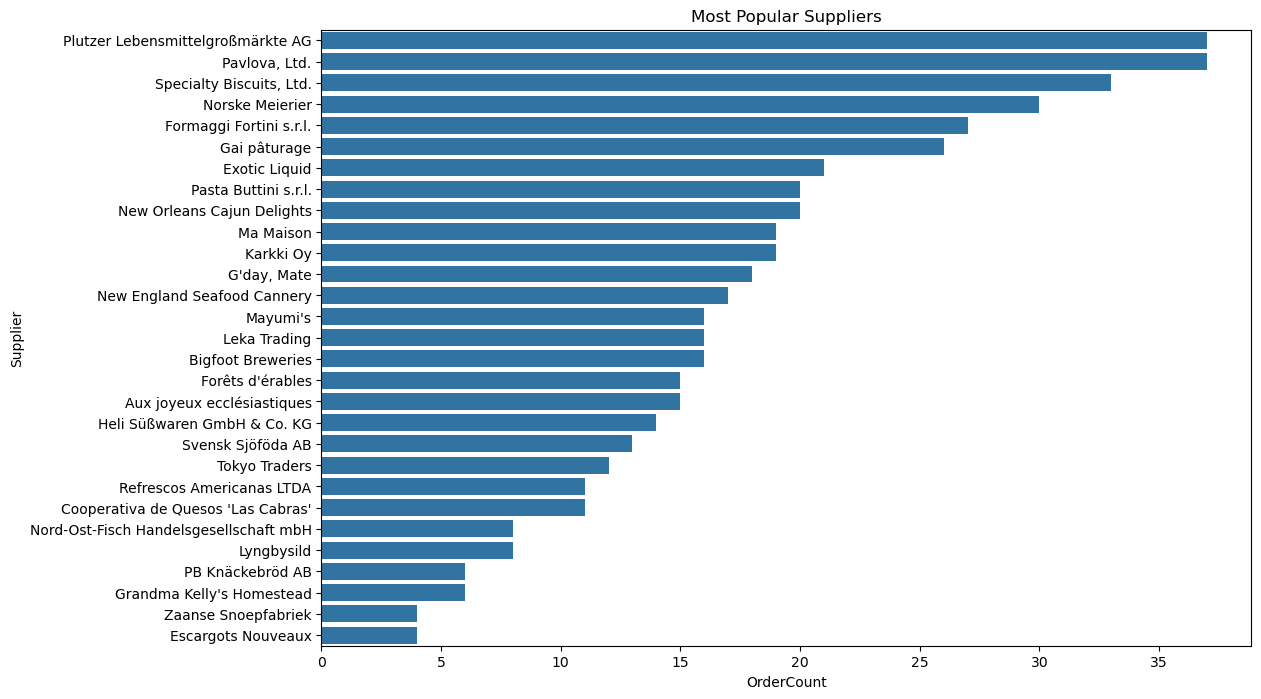

In [57]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns=["Supplier", "OrderCount"])

# TODO: Generate a visualization on this dataframe
sns.barplot(data=df, x="OrderCount", y="Supplier")
plt.title("Most Popular Suppliers")
plt.show()

## Report

Answer the following analytical questions using numerical evidence.

### Question 1

Which countries have the greatest number of customers? How does this correlate with the number of suppliers by country (i.e. do more customers lead to less or more suppliers)? Which evidence supports your answer?

The country with the most customers is the United States, with a total of 13 customers compared to the second highest, Germany, who has 11. This aligns to the common country of origin for suppliers as the United States has the most with a total of four compared to the other countries who on average have 2. 

### Question 2

What is the least popular product by order quantity? How does this correlate with revenue (i.e. do less popular products by quantity lead to less or more revenue)? Which evidence supports your answer?

The least popular product based on order quantity is Laughing Lumberjack Lager with a total of 5 units sold. Surprisingly, the product that generated the least revenue is Rogede sild, with a total revenue of 9.5, compared to Laughing Lumberjack Lager, with a total of 14. More Rogede silds were sold, with a total of 15, but it still yielded a smaller revenue overall. Rogede sild was the second least popular product based on quantity sold. This suggests that price has a greater influence on total revenue than the quanity of the item sold. 

### Question 3

Which country has the most orders? How does this correlate with the number of customers who do not order (i.e. do countries with more ordering customers have more or less non-ordering customers)? Which evidence supports your answer?

The country with the most orders is the United States, with a total of 29 orders. Interestingly, the United States also has the highest number of customers who do not place any orders, with a total of 5 customers. This suggests that having more customers overall will lead to an increase in active and inactive customers.

### Question 4

Which supplier has the most orders? Which evidence supports your answer?

The supplier with the most orders placed is Plutzer Lebensmittelgroßmärkte AG, with a total of 37 orders. This may suggest that this supplier offers products that are in high demand. Surprisingly, none of the top five suppliers are based in the United States, even though the U.S. has the highest overall number of orders placed.
This result was determined using a SQL query that joined the Suppliers, Products, and OrderDetails tables. The query grouped the data by supplier and counted how many unique orders included their products.